# ***MACHINE LEARNING PROJECT***

# ***Heart Stroke Detection***

###  Name : V Sai Charan 20BCR7105
###         V Lakshmi Kalyani 20BCI7116
             


### ***POJECT AND DATASET LINK:-***https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

***Preprocessing Used In the Project:***

1.Removed NA values

2.removed un necessarly columns

3.recoded the data

## ***ATTRIBUTE DETAILS IN THE TABLE***

***id***: unique identifier

***gender***: "Male", "Female" or "Other"

***age***: age of the patient

***hypertension***: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

***heart_disease***: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

***ever_married***: "No" or "Yes"

***work_type***: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

***Residence_type***: "Rural" or "Urban"

***avg_glucose_level***: average glucose level in blood

***bmi***: body mass index

***smoking_status***: "formerly smoked", "never smoked", "smokes" or "Unknown"*

***stroke***: 1 if the patient had a stroke or 0 if not (**Class Label**)


In [1]:
%pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# !pip install lux-widget --quiet

     - 0 bytes ? 0:00:00
     - 19.6 kB 510.3 kB/s 0:00:00
     - 59.8 kB 725.3 kB/s 0:00:00
     \ 81.8 kB 835.9 kB/s 0:00:00
     \ 81.8 kB 835.9 kB/s 0:00:00
     | 81.8 kB 835.9 kB/s 0:00:00
     | 81.8 kB 835.9 kB/s 0:00:00
     / 81.8 kB 835.9 kB/s 0:00:00
     / 81.8 kB 835.9 kB/s 0:00:00
     - 81.8 kB 835.9 kB/s 0:00:00
     - 81.8 kB 835.9 kB/s 0:00:00
     \ 81.8 kB 835.9 kB/s 0:00:00
     \ 81.8 kB 835.9 kB/s 0:00:00
     | 114.0 kB 196.7 kB/s 0:00:00
     / 114.0 kB 196.7 kB/s 0:00:00
     / 114.0 kB 196.7 kB/s 0:00:00
     / 154.3 kB 235.6 kB/s 0:00:00
     - 283.0 kB 406.6 kB/s 0:00:00
     - 339.7 kB 448.6 kB/s 0:00:00
     \ 367.3 kB 456.7 kB/s 0:00:00
     \ 398.0 kB 467.7 kB/s 0:00:00
     | 426.2 kB 474.7 kB/s 0:00:00
     | 446.0 kB 480.3 kB/s 0:00:00
     / 476.8 kB 480.7 kB/s 0:00:00
     / 504.3 kB 501.1 kB/s 0:00:01
     - 535.1 kB 507.9 kB/s 0:00:01
     - 572.9 kB 520.7 kB/s 0:00:01
     \ 603.6 kB 526.2 kB/s 0:00:01
     \ 641.4 kB 537.2 kB/s 0:00:01
     | 

ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\Kalyani Viswanadha\OneDrive\Desktop\Heart-Stroke\venv\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "c:\Users\Kalyani Viswanadha\OneDrive\Desktop\Heart-Stroke\venv\Lib\site-packages\pip\_internal\cli\req_command.py", line 245, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Kalyani Viswanadha\OneDrive\Desktop\Heart-Stroke\venv\Lib\site-packages\pip\_internal\commands\install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "c:\Users\Kalyani Viswanadha\OneDrive\Desktop\Heart-Stroke\venv\Lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "c:\Users\Kalyani Viswanadha\One

In [12]:
import sys
import numpy as np
import pandas as pd
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
#import tensorflow as tf
from sklearn.model_selection import train_test_split
import math
# Importing library for balancing the data.
from imblearn.over_sampling import RandomOverSampler


sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

#----------------for Standarlizing the data-----------------
from sklearn.preprocessing import StandardScaler
#----------------for accuracy-----------------
from sklearn.metrics import confusion_matrix, accuracy_score



In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [13]:
HeartStrokeData=pd.read_csv("heart.csv")

In [14]:
data=pd.read_csv("heart.csv")

In [ ]:
profile=ProfileReport(HeartStrokeData,title='Strode Prediction Profile Report',html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## ***Preprocessing***

In [15]:
HeartStrokeData

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [16]:
#@title ID is not necessary so it is dropping  { form-width: "40%" }
data.drop(["id"], axis=1, inplace = True);

In [17]:
data.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [18]:
data["bmi"].isna().sum()

201

In [19]:
data=data.dropna()
# checking after removing the NA values from the column EventSubType
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [20]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<Axes: ylabel='count'>

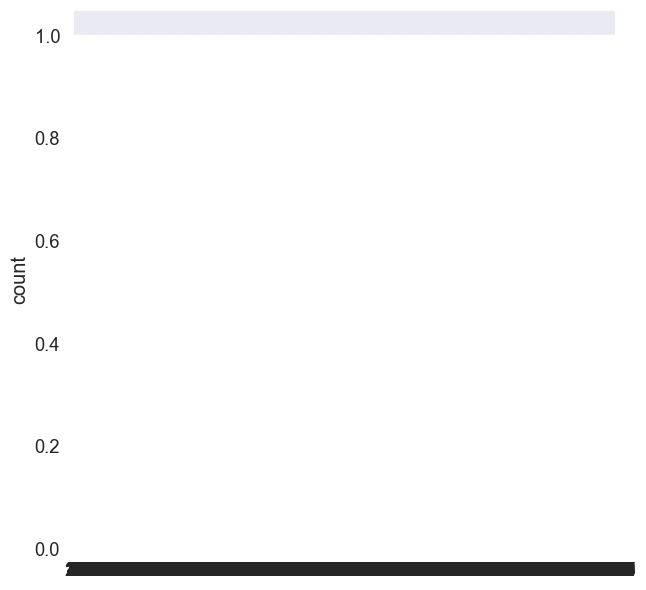

In [21]:
sns.countplot(data['stroke'],label="Count")

## ***Normalize the data***

In [22]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0



###  ***Recoding the data***


***Rescaling the dataset columns***

*   **Gender:**Male=1,Female=2
*   **Married:**Yes=1,No=0
*   **Resident:**Urban=1,Rural=2
*   **Smoking:**Unknown=0,never smoked=1,formerly smoked=2,smokes=3
*   **Work Type:**never_worked=0,private=1,self_employed=2,children=3,Govt_job=4







In [23]:
#@title
Gender={'Male':1,'Female':2,'Other':3}
data["gender"].replace(Gender,inplace=True)
Married={'Yes':1,'No':0}
data["ever_married"].replace(Married,inplace=True)
Resident = {'Urban':1,'Rural':2}
data["Residence_type"].replace(Resident,inplace=True)
Smoking = {'Unknown':0,'never smoked':1,'formerly smoked':2,'smokes':3}
data["smoking_status"].replace(Smoking,inplace=True)
WorkType = {'Never_worked':0,'Private':1,'Self-employed':2,'children':3,'Govt_job':4}
data["work_type"].replace(WorkType,inplace=True)


In [24]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,2,1
2,1,80.0,0,1,1,1,2,105.92,32.5,1,1
3,2,49.0,0,0,1,1,1,171.23,34.4,3,1
4,2,79.0,1,0,1,2,2,174.12,24.0,1,1
5,1,81.0,0,0,1,1,1,186.21,29.0,2,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 460.2 KB


 ***Observation:***


*   Now in the data set we have every thing in number either int or float
*   Every thing is normalized now




## ***Visualization of data with respect to Stroke***

In [26]:
data1=data

<Axes: xlabel='stroke', ylabel='count'>

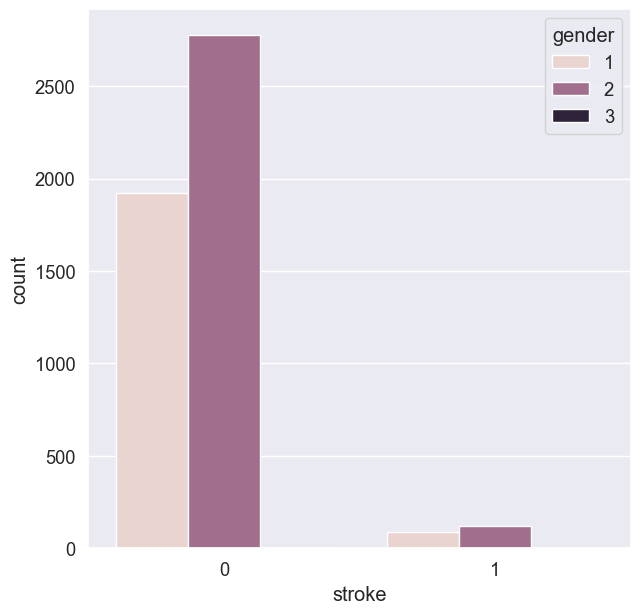

In [27]:
#@title
sns.countplot(x="stroke",data=data1,hue='gender')

***Observation***
1.   We could notice that the dataset is imbalanced
2.   Among those who have experienced stroke, females are higher


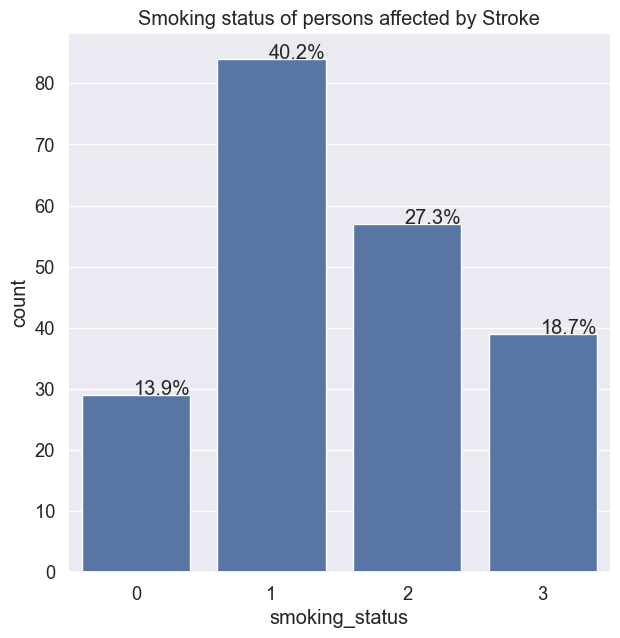

In [28]:
ax=sns.countplot(x='smoking_status',data=data1[data1['stroke']==1])
plt.title("Smoking status of persons affected by Stroke")
total_1 =float(len(data1[data1['stroke']==1]))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

***Observation:***


*   **Around 45% of the people who are affected by strokes, they have either formaly smoked or smokes. So, Smoking might also be a factor which could cause strokes**
*   **Smoking:**Unknown=0,never smoked=1,formerly smoked=2,smokes=3



C:\Users\Kalyani Viswanadha\AppData\Local\Temp\ipykernel_11280\2449221970.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[data1['stroke']==1]['age'],color='red')


Text(0.5, 1.0, 'Distribution of age of people affected by stroke')

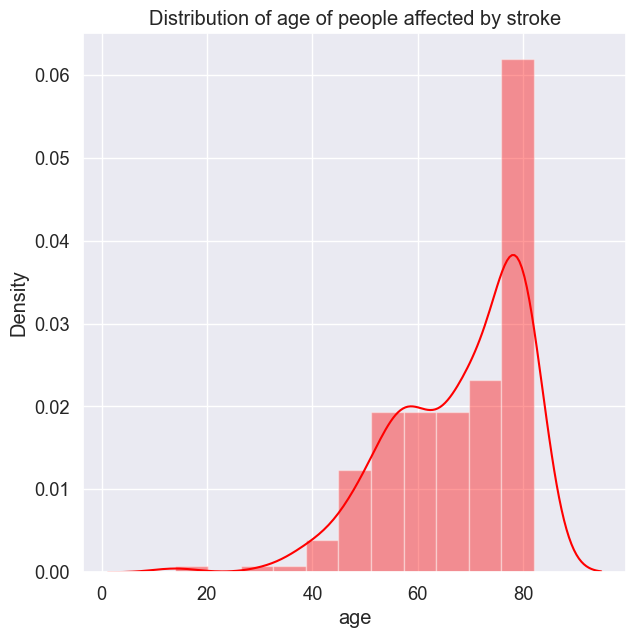

In [29]:
# sns.displot(data=df1, x="age", col="stroke", kind="kde")
sns.distplot(data1[data1['stroke']==1]['age'],color='red')
plt.title("Distribution of age of people affected by stroke")

***Observation:***


*   Most of them who got stroke are older people aged above 60. Age factor could be a potential threat for stroke. Older people should monitor their condition with atmost care to prevent stroke.
*   Younger generation might be less susceptible to stroke
*   May be this will be the more require column to predict the stroke



Text(0.5, 1.0, 'Work type of people Who affected by Stroke')

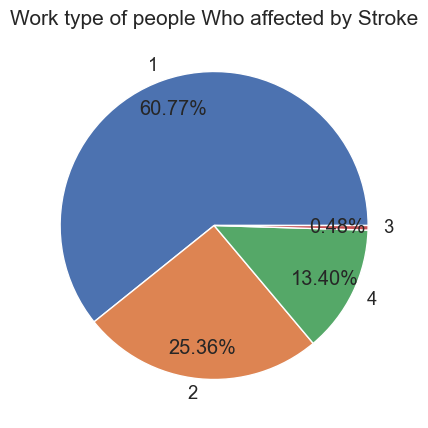

In [30]:
work_type = data1[data1['stroke'] == 1]['work_type'] #here taking the data of only who got stroke
values = work_type.value_counts()
labels = values.keys()
bar,ax = plt.subplots(figsize=(5,5))
plt.pie(x = values, labels = labels , autopct="%.2f%%",pctdistance=0.8)
plt.title('Work type of people Who affected by Stroke', fontsize=15)

***Observation:***


*   59.84% of the people who are affected by stroke belongs to private work type. Very less percent of around 13% of the people belongs to Govt Job. So, Based on the analysis we could say that the candiates working in private jobs might experience high stress or pressure.
*   **Work Type:**never_worked=0,private=1,self_employed=2,children=3,Govt_job=4


C:\Users\Kalyani Viswanadha\AppData\Local\Temp\ipykernel_11280\457714517.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[data1['stroke']==1]['bmi'],color='red')


Text(0.5, 1.0, 'Distribution of bmi of people Who affected by stroke')

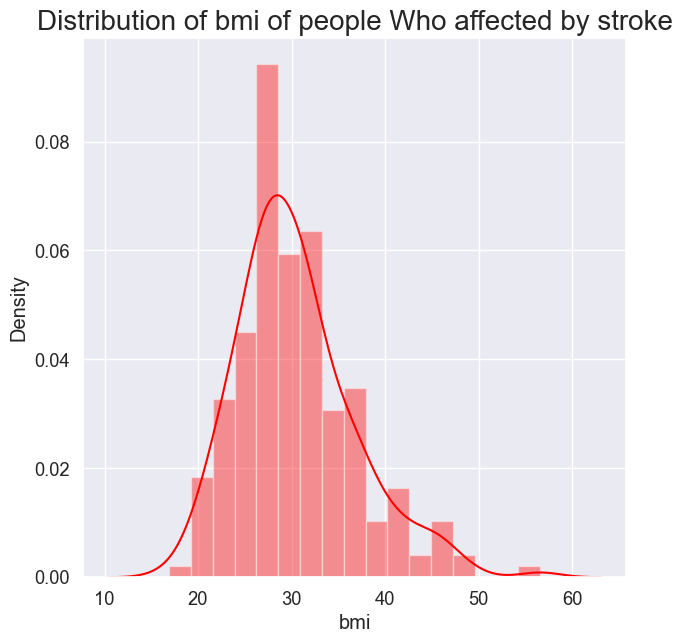

In [31]:
sns.distplot(data1[data1['stroke']==1]['bmi'],color='red')
plt.title("Distribution of bmi of people Who affected by stroke",fontsize=20)

***Observation:***


*   Average BMI value of people affected by stroke is 30. BMI value of greater than 25 is considered to be obese. On a average we could say that people who are affected by stroke are obese. From the graph we could notice that few have bmi of greater than 45, they are considered to be morbidly obese



Text(0.5, 1.0, 'Average glucose level')

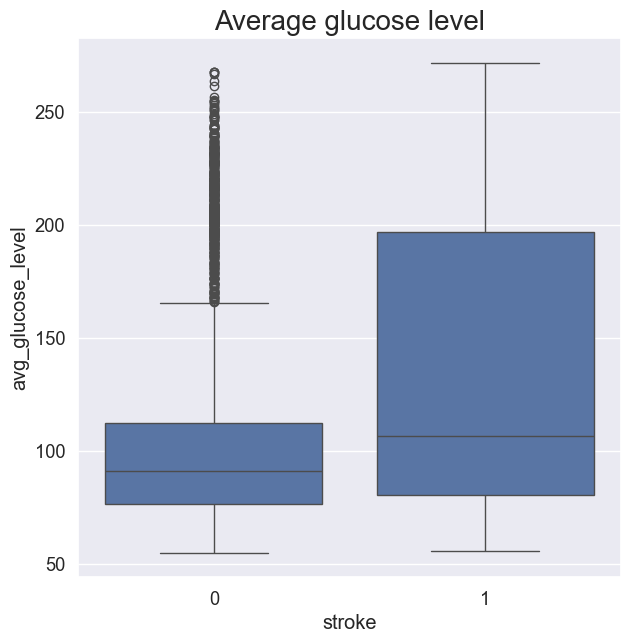

In [32]:
sns.boxplot(x="stroke",y="avg_glucose_level",data=data1)
plt.title("Average glucose level",fontsize=20)

***Observation:***


*   People who are affected by Stroke have higher glucose level of above 100 on average. A fasting blood sugar level of 100-125 is considered to be prediabetic.



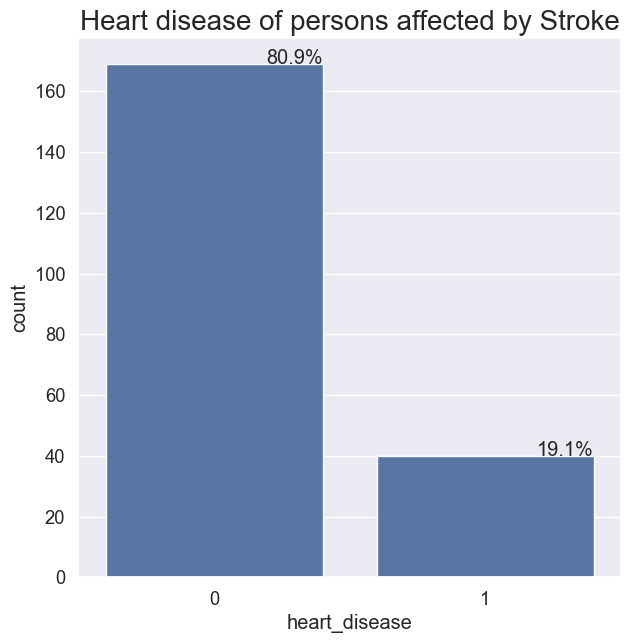

In [33]:
ax=sns.countplot(x='heart_disease',data=data1[data1['stroke']==1])
plt.title("Heart disease of persons affected by Stroke",fontsize=20)
total_1 =float(len(data1[data1['stroke']==1]))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

***Observation:***


*   81 percent of the people are who are affected by stroke dont have a heart disease. Heart disease might not be a significant reason for stroke



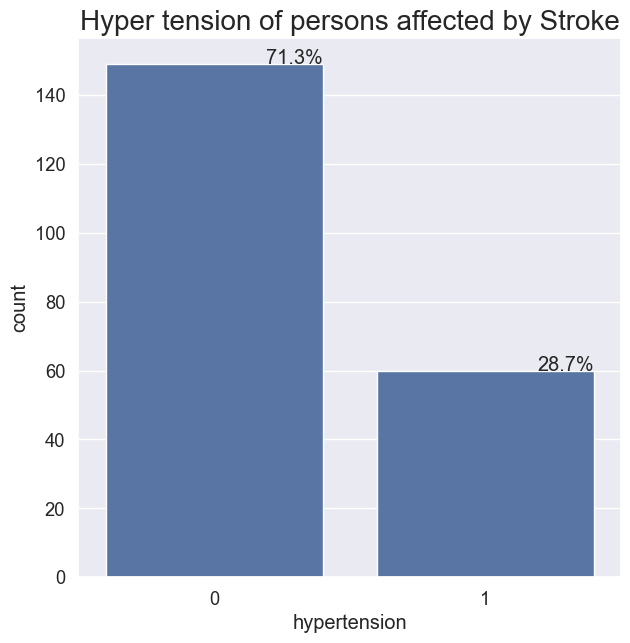

In [34]:
ax=sns.countplot(x='hypertension',data=data1[data1['stroke']==1])
plt.title("Hyper tension of persons affected by Stroke",fontsize=20)
total_1 =float(len(data1[data1['stroke']==1]))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()
# df1.head()

***Observation:***

*   73% of the people who are affected by Stroke are not suffering from Hypertension. So, Even Hypertension might not be a significant reason for stroke




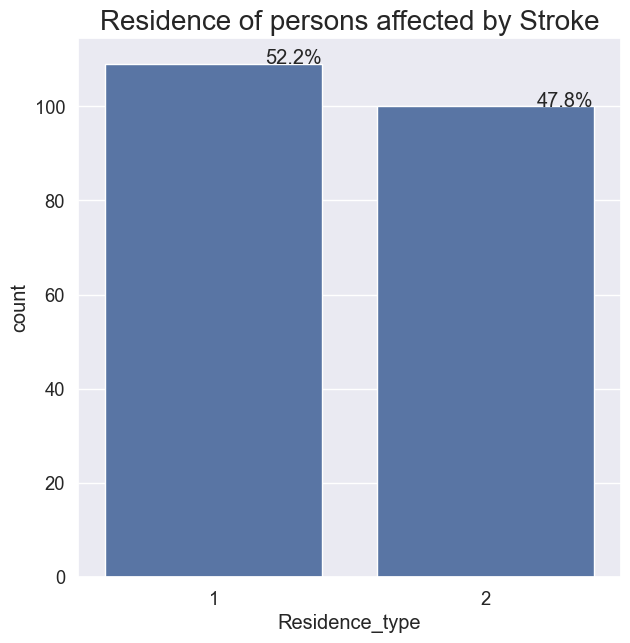

In [35]:
ax=sns.countplot(x='Residence_type',data=data1[data1['stroke']==1])
plt.title("Residence of persons affected by Stroke",fontsize=20)
total_1 =float(len(data1[data1['stroke']==1]))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

***Observation:***


*   Around 54% of the people affected by Stroke are from Urban area. A possible reason could be people in urban areas might experience health issues due to pollution and other factors such as eating habits, etc



In [36]:
corr = data1.corr()
corr.style.background_gradient(cmap='coolwarm')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.029817,-0.021978,-0.083014,0.035543,-0.035945,-0.003755,-0.052613,0.025658,0.004060,-0.007021
age,0.029817,1.000000,0.274425,0.257123,0.680782,-0.161704,-0.010948,0.235838,0.333398,0.317886,0.232331
hypertension,-0.021978,0.274425,1.000000,0.115991,0.162406,-0.023198,0.001074,0.180543,0.167811,0.106902,0.142515
heart_disease,-0.083014,0.257123,0.115991,1.000000,0.111245,-0.022466,0.002362,0.154525,0.041357,0.093732,0.137938
ever_married,0.035543,0.680782,0.162406,0.111245,1.000000,-0.146122,-0.004989,0.151377,0.341695,0.291171,0.105089
work_type,-0.035945,-0.161704,-0.023198,-0.022466,-0.146122,1.000000,-0.010274,-0.023339,-0.182167,-0.154526,-0.028180
Residence_type,-0.003755,-0.010948,0.001074,0.002362,-0.004989,-0.010274,1.000000,0.007617,0.000122,-0.026714,-0.006031
avg_glucose_level,-0.052613,0.235838,0.180543,0.154525,0.151377,-0.023339,0.007617,1.000000,0.175502,0.081368,0.138936
bmi,0.025658,0.333398,0.167811,0.041357,0.341695,-0.182167,0.000122,0.175502,1.000000,0.222564,0.042374
smoking_status,0.004060,0.317886,0.106902,0.093732,0.291171,-0.154526,-0.026714,0.081368,0.222564,1.000000,0.069839


***Observation:***


*   Age is almost slightly positive correlated with other features such as hyper tension, heart disease, glucose level, bmi and even stroke. So, As the age increases, the health related issues also increases in general. Here, Age could be a good indicator for predicting whether a person will be affected by Stroke or not



### Removing Unnecessary colums for better prediction

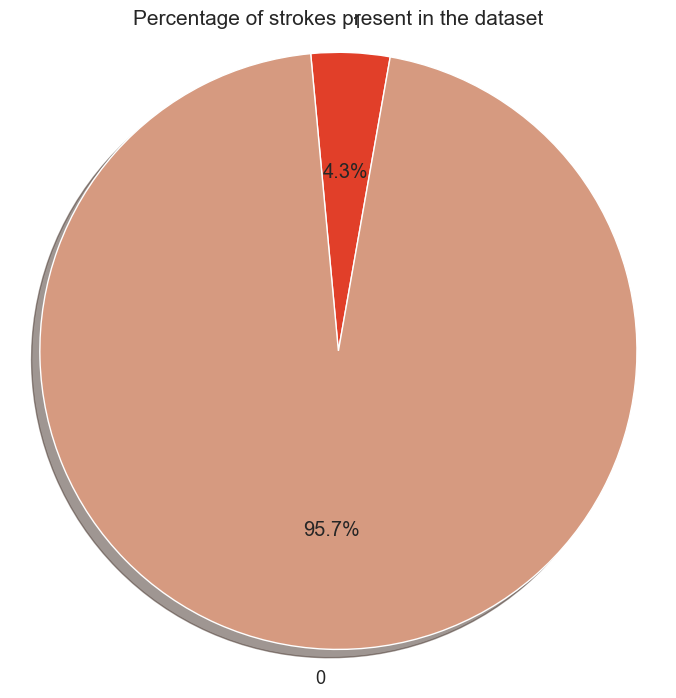

In [38]:
#@title Only 4.9% of people are affected by stroke so the data available to us is imbalanced and we need to balance it before giving to our machine learning algorithms { vertical-output: true, form-width: "40%" }
stroke=Counter(data1['stroke'])
classes=[]
count=[]   #list to store no of laels of each class
for i in stroke.keys():
    classes.append(i)
    count.append(stroke[i])
colors = ["#E13F29", "#D69A80"]

plt.pie(
    count,
    labels = classes,
    shadow = True,
    colors = colors,
    startangle=80,
    autopct='%1.1f%%'
)
plt.axis('equal')
plt.tight_layout()
plt.title("Percentage of strokes present in the dataset", fontsize=15)
plt.show()

In [39]:
data1.age.value_counts()

age
78.00    93
57.00    93
52.00    85
54.00    84
55.00    83
         ..
1.40      3
0.16      3
0.40      2
0.08      2
0.48      2
Name: count, Length: 104, dtype: int64

C:\Users\Kalyani Viswanadha\AppData\Local\Temp\ipykernel_11280\2206743449.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1['age'],shade=True)


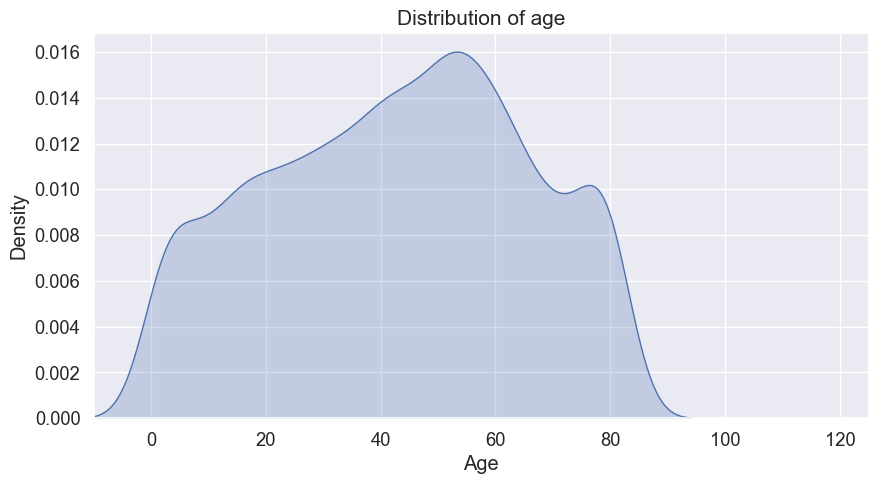

In [40]:
plt.figure(figsize=(10,5))
plt.xlim(-10,125)
plt.xlabel('Age')
plt.ylabel('Density')
sns.kdeplot(data1['age'],shade=True)
plt.title('Distribution of age', fontsize=15)
plt.show()

# APPLYING MACHINE LEARNING ALGORITHIMS

## ***1.Logistic Regression***

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [42]:
dataLR=data
dataLR

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,2,1
2,1,80.0,0,1,1,1,2,105.92,32.5,1,1
3,2,49.0,0,0,1,1,1,171.23,34.4,3,1
4,2,79.0,1,0,1,2,2,174.12,24.0,1,1
5,1,81.0,0,0,1,1,1,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,2,13.0,0,0,0,3,2,103.08,18.6,0,0
5106,2,81.0,0,0,1,2,1,125.20,40.0,1,0
5107,2,35.0,0,0,1,2,2,82.99,30.6,1,0
5108,1,51.0,0,0,1,1,2,166.29,25.6,2,0


In [43]:
dataLR.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [44]:
#@title Separating the class label column { form-width: "20%" }
data_y=dataLR[['stroke']]
# data_y1
data_x=dataLR[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status']]
# data_x1

In [45]:
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=0)
# print(x_wtrain)
# print(x_wtest)
# print(y_wtrain)
# print(y_wtest)

In [46]:
logistic=LogisticRegression() #logistic regression
logistic.fit(x_train,y_train)
logis_predicted=logistic.predict(x_test)
print('Training Score:',logistic.score(x_train, y_train))
print('Testing Score:',logistic.score(x_test, y_test))
print('Accuracy:',accuracy_score(y_test,logis_predicted)*100)
print('Confusion Matrix: \n', confusion_matrix(y_test,logis_predicted))

Training Score: 0.957983193277311
Testing Score: 0.9562118126272913
Accuracy: 95.62118126272912
Confusion Matrix: 
 [[939   0]
 [ 43   0]]


C:\Users\Kalyani Viswanadha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kalyani Viswanadha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## ***2.Decision Tree***

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


In [48]:
dataDT=data
dataDT.shape

(4909, 11)

In [49]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [50]:
#@title Separating the class label column { form-width: "20%" }
data_y=data[['stroke']]
data_x=data[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]


In [51]:
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=0)
# print(x_wtrain)
# print(x_wtest)
# print(y_wtrain)
# print(y_wtest)

In [52]:
decisiontree = DecisionTreeClassifier(random_state=42) # decision tree
decisiontree.fit(x_train, y_train)
decisiontreew_predicted = decisiontree.predict(x_test)
print('Training Score:',decisiontree.score(x_train, y_train))
print('Test Score:',decisiontree.score(x_test, y_test))
print('Accuracy:',accuracy_score(y_test, decisiontreew_predicted)*100)
print('Confusion Matrix: \n',confusion_matrix(y_test,decisiontreew_predicted))

Training Score: 1.0
Test Score: 0.9175152749490835
Accuracy: 91.75152749490834
Confusion Matrix: 
 [[895  44]
 [ 37   6]]


## ***3.RANDOM FOREST***

In [53]:
#Required Packages for this Algorithim
from sklearn.ensemble import RandomForestClassifier

In [54]:
data_RF=data

In [55]:
data_RF.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [56]:
#@title Separating the class label column { form-width: "20%" }
data_y=data_RF[['stroke']]
data_x=data_RF[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]


In [57]:
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=0)
#print(x_train)
#print(x_test)
#print(y_train)
#print(y_test)

**Applying Random Forest Algorithim for the Class Labels**

In [58]:
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

C:\Users\Kalyani Viswanadha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [59]:
y_predict = classifier.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [60]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.045824847250509164
Mean Squared Error: 0.045824847250509164
Root Mean Squared Error: 0.21406738950739126


In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
print(accuracy_score(y_test, y_predict))

[[936   3]
 [ 42   1]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.25      0.02      0.04        43

    accuracy                           0.95       982
   macro avg       0.60      0.51      0.51       982
weighted avg       0.93      0.95      0.94       982

0.9541751527494908


In [62]:
# K-Means

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
#from sklearn.preprocessing import LabelEncoder



# ***Final Conclusion***


*   Here we had performed a 3 Machine Learning Algorithims
    Those are :
        1)Logistic Regression
        2)Decession Tree
        3)Random Forest
*   From the above we got the accuracy be like
        Logistic Regression had got an accuracy of 95.62%
        Decession Tree had got an accuracy of 91.75%
        Random Forest had got an accuracy of 95.41
* From the above analysis we can say that Logistic regression got the better accuracy




---


> ***What we have did in the Project***
          
          1)Checked the data pattern
          2)Imported the required Packages
          3)Applied a Preprocess techniques
                i)In preprocess we had did a
                      Data analysis Using Pandas Profiling Report
                      Removing Null Values from the data
                      Visualization
                      Normalization
          4)Created the models for the algorithms and trained the data
          5) Finally Checked the accuracy of all the algorithims and then came to the best accuracy algorithm.

---

> **What is in the Profile Report(Pandas Profiling Report)**

      Full detailed analysis of dataset will be given from the pandas profile
          1)Overview
              i)Variable details like Distinct,mean,min and max,missing data etc
                    it will also show the statistics,Histogram,Common and Extreme values
              ii)Interactions between 2 columns of all pairs of columns in the dataset(we can call it as the scatter plot for 2 columns)
              iii)Correlations of dataset
                    Having 4 types of correlations.
                        a)Spearman's
                        b)Pearson's
                        c)Kendali's
                        d)Phik(it is new and practical correlation coefficient
              iV)Missing Values
              V)Sample data
          2)Alerts











In [64]:
import pickle

In [66]:
pickle.dump(logistic,open('heart_stroke.pkl','wb'))